# Fingerprint viewer
This takes the output `style_fingerprint` or `content_fingerprint` and creates and image with all of them on it. 

In [1]:
import pickle 
import numpy as np
from os.path import basename, join
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive


# Mount drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
root_dir = '/content/drive/My Drive/ra15808/Courses/Art_of_MD/art_of_md'

In [4]:
style_name = 'okeefe'
file_path = join(root_dir, 'images', 'fingerprints', '{}-InceptionV1-fingerprint.p'.format(style_name))
output_path = file_path.replace('.p', '.png')


In [5]:
with open(file_path, 'rb') as f:
    fingerprint = pickle.load(f)

In [6]:
# Reorder if necessary
layer_names = [x for x in fingerprint.keys()]
layer_names

['conv2d0',
 'conv2d1',
 'conv2d2',
 'mixed3a',
 'mixed3b',
 'mixed4a',
 'mixed4b',
 'mixed4c',
 'mixed4d',
 'mixed4e',
 'mixed5a',
 'mixed5b',
 'head0_bottleneck',
 'head1_bottleneck']

In [7]:
def clean_plot(ax, img):
    ax.imshow(img)
    ax.tick_params(bottom=False, top=False, left=False, right=False, 
                   labelbottom=False, labeltop=False, labelleft=False, labelright=False)
    return ax

In [8]:
TARGET_INDEX = 0
STYLE_INDEX = 1


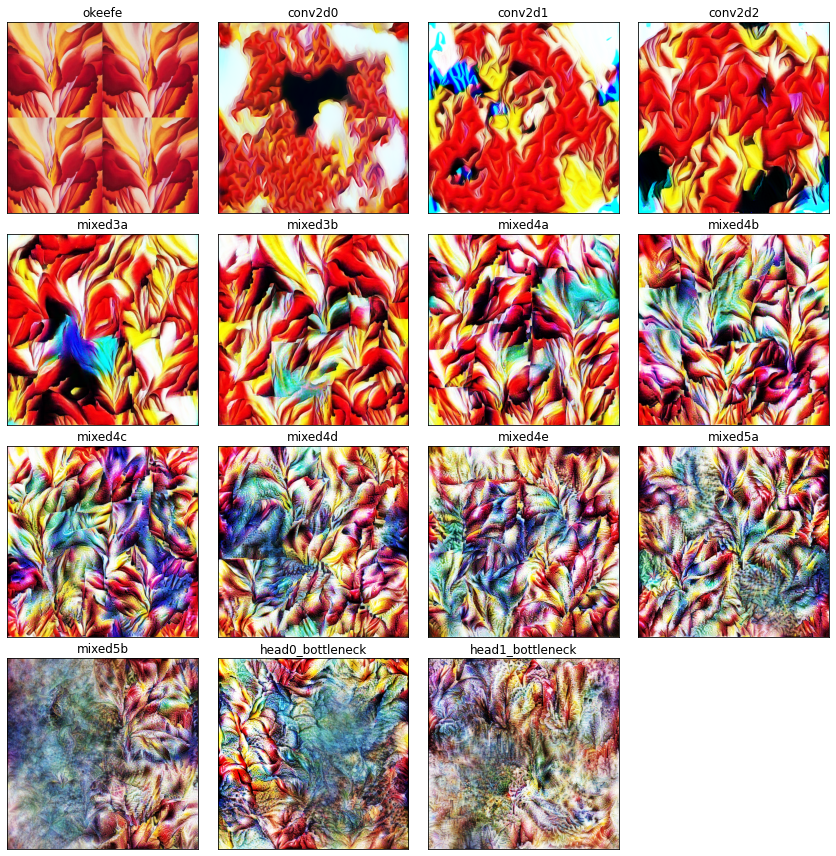

In [9]:
num_layers = len(layer_names)
ncols = 4
num_plots = num_layers +1 
nrows= (num_plots - 1)//ncols +1  # this gives correct number of rows/cols

img_width = 3 # inches
fig = plt.figure(figsize=(img_width*ncols, nrows*img_width))

# The style image
ax = fig.add_subplot(nrows, ncols, 1)
clean_plot(ax, fingerprint[layer_names[0]][STYLE_INDEX])
ax.set_title(style_name)

for i in range(1, len(fingerprint)+1):
    ax = fig.add_subplot(nrows, ncols, i+1)
    layer = layer_names[i-1]
    clean_plot(ax, fingerprint[layer][TARGET_INDEX])
    ax.set_title(layer)

plt.tight_layout(h_pad=0.5, w_pad=0.1)
plt.savefig(output_path)

In [ ]:
# x = np.arange(20)+1
# n_cols = 4

# n_rows = (x-1)//n_cols + 1
# print(np.vstack([x, n_rows]))